## Курсовой проект

**Задание**: Используя данные из train.csv, построить модель для предсказания цен на недвижимость (квартиры). С помощью полученной модели предсказать цены для квартир из файла test.csv.

**Целевая переменная**: Price

**Метрика**: R2 - коэффициент детерминации (sklearn.metrics.r2_score)

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline

Можно еще **%config InlineBackend.figure_format='svg'**, но он рвет мне экран

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('train.csv')

In [5]:
data.shape

(10000, 20)

In [6]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


Удаляем признак `Healthcare_1`, т.к. в нем пропущенно почти 50% значений.

In [8]:
data.drop('Healthcare_1', axis=1, inplace=True)

In [9]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


Нормализуем данные в столбцах `HouseYear` и `Rooms`:

In [10]:
data.loc[data.HouseYear > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,5,8,B,243028.603096


In [11]:
data.loc[data.HouseYear==20052011, 'HouseYear'] = 2011
data.loc[4189, 'HouseYear'] = 1968

In [12]:
data.Rooms.value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [13]:
data.loc[data.Rooms > 4]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1422,4282,195,5.0,95.617533,62.377052,7.0,7,7.0,1940,0.015017,B,B,17,3079,59,0,8,B,479525.147323
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
1503,1243,86,5.0,108.057398,82.723825,8.0,3,5.0,1942,0.161976,B,A,31,7010,5,3,7,B,310305.074733
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.964416
3268,8901,34,5.0,121.577423,114.913843,1.0,25,1.0,1977,0.069753,B,B,53,13670,4,1,11,B,455446.393758
3271,6358,27,5.0,42.003293,NaN,0.0,5,12.0,1977,0.011654,B,B,4,915,0,0,0,B,112693.641769
4431,7594,53,5.0,39.906082,39.394024,1.0,5,1.0,1977,0.049637,B,B,34,7759,0,1,3,B,206148.845716
4487,13434,13,5.0,183.382273,100.985505,15.0,2,6.0,1997,0.090799,B,B,74,19083,2,5,15,B,622888.825328


In [14]:
data.loc[1454, 'Rooms'] = 1
data.loc[[377, 3271, 4431], 'Rooms'] = 2
data.loc[[2170, 8849], 'Rooms'] = 3

Разбиваем данные на тренировочную и валидационную выборки.

In [15]:
X_train, X_valid = train_test_split(data, test_size=0.3, random_state=42)

In [16]:
X_train.shape, X_valid.shape

((7000, 19), (3000, 19))

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 19 columns):
Id               7000 non-null int64
DistrictId       7000 non-null int64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       5514 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null int64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null int64
Ecology_1        7000 non-null float64
Ecology_2        7000 non-null object
Ecology_3        7000 non-null object
Social_1         7000 non-null int64
Social_2         7000 non-null int64
Social_3         7000 non-null int64
Helthcare_2      7000 non-null int64
Shops_1          7000 non-null int64
Shops_2          7000 non-null object
Price            7000 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
X_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,7000.000000,7000.000000,7000.000000,7000.000000,5514.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,8386.061714,50.560857,1.884286,56.307485,37.523283,6.490714,8.521286,12.654571,1984.919714,0.117840,24.767571,5364.425714,8.044571,1.313143,4.260571,214449.167390
std,4864.141324,43.744178,0.809138,20.507466,102.071817,33.999713,5.222043,6.851357,18.310614,0.118599,17.583889,4011.768297,23.869975,1.488326,4.825024,92924.798790
min,0.000000,0.000000,0.000000,2.377248,0.370619,0.000000,1.000000,0.000000,1912.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4176.500000,19.000000,1.000000,41.744710,22.766442,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,154599.240157
50%,8398.500000,37.000000,2.000000,52.633656,32.868499,6.000000,7.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192290.039215
75%,12562.000000,75.000000,2.000000,65.981105,45.121115,9.000000,12.000000,17.000000,2001.000000,0.194489,36.000000,7227.000000,5.000000,2.000000,6.000000,249080.956886
max,16796.000000,209.000000,5.000000,604.705972,7480.592129,2014.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,627525.072788


Заменяем 0-комнатные квартиры на квартиры другой комнатности, исходя из средней площади квартир с разным количеством комнат.

In [19]:
X_train.loc[X_train.Rooms == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,0,0,B,212864.799112
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1,0,B,217009.338463
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798


In [20]:
rooms_square_medians = X_train.groupby(['Rooms'], as_index=False)['Square'].median()
rooms_square_medians.drop(0, axis=0, inplace=True)
rooms_square_medians

,Rooms,Square
1,1.0,40.353135
2,2.0,55.943288
3,3.0,77.441458
4,4.0,98.686703
5,5.0,116.592852


In [21]:
def change_0_rooms(df, rooms_square_medians):
    for ind in df.loc[df.Rooms == 0].index:
        
        for room in rooms_square_medians.index[::-1]:
            
            if df.loc[ind, 'Square'] < rooms_square_medians.loc[room, 'Square']:
                rooms = room
                
            else:
                if room == 5:
                    rooms = 5
                else:
                    break
        
        df.loc[ind, 'Rooms'] = rooms
        
    return df

In [22]:
X_train = change_0_rooms(X_train, rooms_square_medians)

/Users/burdugova/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Очищаем данные от завышенных значений `Square` и `LifeSquare`:

In [23]:
X_train.loc[X_train.Square > 300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,3,6,B,90470.430830


In [24]:
X_train.loc[4262, 'Square'] = X_train.loc[4262, 'Square'] / 10

X_train.loc[4690, 'Square'] = X_train.loc[4690, 'Square'] / 10

In [25]:
median_square_lifesquare = (X_train.Square / X_train.LifeSquare).median()
median_square_lifesquare

1.6205065601834858

In [26]:
X_train['LifeSquare'] = X_train['LifeSquare'].fillna(X_train.Square / median_square_lifesquare)

/Users/burdugova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
X_train.loc[X_train.LifeSquare > 300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,0,0,B,217357.492366
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,1,7,B,394253.299978
4690,2307,102,1.0,40.942518,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,3,6,B,90470.430830


In [28]:
X_train.loc[[8437, 4690], 'LifeSquare'] = X_train.loc[[8437, 4690], 'LifeSquare'] / 10
X_train.loc[4328, 'LifeSquare'] = 48

Для малых значений `Square` делаем замену, привязанную к количеству комнат, а для  малых значений `LifeSquare` и значений, превышающих `Square`, - к медианному отношению `Square/LifeSquare`

In [29]:
X_train.loc[X_train.Square < 17]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.403061
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.806186
7767,6927,21,1.0,16.117154,8.822988,0.0,2,5.0,1965,0.194489,B,B,47,8004,3,3,5,B,79913.267856
9613,7657,38,1.0,4.502784,4.618547,1.0,28,1.0,1977,0.060753,B,B,15,2787,2,0,7,B,483283.488083
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441
4853,3224,27,1.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
9294,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,3,2,B,438005.182323


In [30]:
X_train.loc[X_train.Square < 16, 'Square'] = X_train.Rooms * 10 + 15

In [31]:
X_train.loc[X_train.LifeSquare < 15]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
477,8849,45,1.0,63.419553,2.286357,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,3,2,B,325600.765809
751,11989,62,3.0,104.446306,1.451067,1.0,12,15.0,2015,0.072158,B,B,2,629,1,0,0,A,223692.672480
5368,15597,169,2.0,68.896696,5.336872,1.0,11,1.0,2016,0.178917,B,B,18,3594,4,1,5,B,338780.798345
1410,1843,74,1.0,49.635712,3.411048,1.0,4,1.0,1977,0.309479,B,B,35,7715,4,0,6,B,146838.036852
9177,13951,45,1.0,39.225914,2.372105,1.0,24,24.0,2017,0.195781,B,B,23,5212,6,3,2,B,271893.118572
8061,4941,6,3.0,83.190541,3.666085,1.0,15,17.0,2017,0.243205,B,B,5,1564,0,0,0,B,221683.641204
1738,2186,27,3.0,81.380553,4.337395,1.0,13,25.0,2015,0.072158,B,B,2,629,1,0,0,A,196743.389597
7068,15346,30,1.0,37.387578,4.699898,1.0,14,22.0,1977,0.000078,B,B,22,6398,141,3,23,B,109553.129485
8012,5561,27,2.0,58.161484,5.815532,1.0,12,12.0,1977,0.011654,B,B,4,915,0,0,0,B,138905.568311
6945,12927,62,2.0,17.414181,10.746134,1.0,4,20.0,1977,0.072158,B,B,2,629,1,0,0,A,180750.471749


In [32]:
X_train.loc[X_train.LifeSquare < 15, 'LifeSquare'] = X_train.Square / median_square_lifesquare

In [33]:
X_train.loc[X_train.LifeSquare > X_train.Square]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1579,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,1,10,B,524365.550705
2683,3207,52,3.0,80.288769,81.668797,0.0,10,17.0,1977,0.371149,B,B,34,7065,1,2,5,B,181796.476207
3815,11775,37,2.0,68.206948,68.325237,1.0,3,9.0,2016,0.178917,B,B,18,3594,4,1,5,B,285114.308471
1108,2150,34,2.0,61.673568,61.762322,1.0,14,14.0,2018,0.069753,B,B,53,13670,4,1,11,B,269906.912907
3495,12863,27,1.0,36.181445,38.075191,0.0,2,12.0,1977,0.011654,B,B,4,915,0,0,0,B,88623.960046
4222,12687,27,2.0,65.444497,68.614227,0.0,7,19.0,1977,0.211401,B,B,9,1892,0,0,1,B,146247.605596
4834,15523,63,1.0,49.039357,50.957360,10.0,19,25.0,2018,0.238617,B,B,26,3889,6,3,6,B,287806.693410
9250,2905,62,2.0,74.393929,76.775595,0.0,2,2.0,2018,0.072158,B,B,2,629,1,0,0,A,187744.555119
9003,16015,62,3.0,85.726420,86.836992,1.0,11,9.0,1977,0.072158,B,B,2,629,1,0,0,A,182964.744574
6041,13875,20,1.0,28.438794,32.514021,6.0,6,10.0,2014,0.019509,B,B,37,7687,11,5,5,B,199248.114376


In [34]:
X_train.loc[X_train.LifeSquare > X_train.Square, 'LifeSquare'] = X_train.Square / median_square_lifesquare

In [35]:
X_train.loc[X_train.HouseFloor < X_train.Floor]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,0,0,B,207007.956663
1579,16258,48,3.0,96.056784,59.275776,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,1,10,B,524365.550705
5753,3766,62,3.0,127.417560,78.628228,0.0,9,0.0,1977,0.072158,B,B,2,629,1,0,0,A,282877.332154
3548,11463,129,3.0,72.953912,39.478723,9.0,16,15.0,1991,0.460556,B,B,20,4386,14,1,5,B,358129.914474
2726,9347,27,1.0,46.513651,21.032802,14.0,7,6.0,1977,0.075424,B,B,11,3097,0,0,0,B,124345.245905
477,8849,45,1.0,63.419553,39.135635,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,3,2,B,325600.765809
1777,15980,1,1.0,42.106365,41.782263,1.0,15,1.0,2019,0.007122,B,B,1,264,0,0,1,B,138632.726757
468,12189,28,3.0,76.205998,46.656823,10.0,18,17.0,2000,0.333892,B,B,30,6564,1,0,0,B,361460.801718
5368,15597,169,2.0,68.896696,42.515530,1.0,11,1.0,2016,0.178917,B,B,18,3594,4,1,5,B,338780.798345
3881,13291,44,2.0,48.003717,32.700670,5.0,7,5.0,1961,0.036122,B,B,24,4378,0,1,1,B,180646.782352


Корректируем данные в поле `HouseFloor` и приводим значения этажности дома, которая меньше этажа квартиры, к значению этажа квартиры.

In [36]:
X_train.loc[X_train.HouseFloor < X_train.Floor, 'HouseFloor'] = X_train.Floor

In [37]:
X_train.loc[X_train.HouseFloor > 40]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
8854,78,30,2.0,65.773749,40.588388,1.0,8,117.0,1977,0.000078,B,B,22,6398,141,3,23,B,207248.370520
6131,10806,5,1.0,51.944587,48.709601,1.0,6,99.0,1977,0.150818,B,B,16,3433,4,4,5,B,296127.115515
4323,6589,30,1.0,62.110823,52.812128,4.0,31,44.0,2009,0.000078,B,B,22,6398,141,3,23,B,117647.461002
2781,1674,76,2.0,74.344672,41.044132,5.0,42,48.0,2016,0.000000,B,B,7,1660,39,1,5,B,411691.504766
8599,9300,74,2.0,71.747869,44.274964,9.0,5,99.0,1977,0.075779,B,B,6,1437,3,0,2,B,243329.912579
3974,6502,20,1.0,126.389517,103.637322,14.0,22,47.0,2012,0.019509,B,B,37,7687,11,5,5,B,450706.552655


In [38]:
X_train.loc[8854, 'HouseFloor'] = 17
X_train.loc[[6131, 8599], 'HouseFloor'] = 9

 Создаем дополнительные признаки:
 - Средняя цена для каждого значения `Social_1`
 - Средняя цена для каждого значения `Social_2`
 - Средняя цена для каждого значения `Social_3`
 - Количество домов в каждом районе
 - Большой/маленький район
 - Средняя цена для каждого значения `Helthcare_2`
 - Средняя цена для каждого количества комнат

In [39]:
X_train.corr()['Price']

Id               0.019332
DistrictId       0.264105
Rooms            0.574382
Square           0.586062
LifeSquare       0.485317
KitchenSquare    0.020301
Floor            0.126098
HouseFloor       0.113500
HouseYear        0.035093
Ecology_1       -0.064129
Social_1         0.265278
Social_2         0.240089
Social_3         0.076234
Helthcare_2      0.253601
Shops_1          0.183545
Price            1.000000
Name: Price, dtype: float64

In [40]:
median_price = X_train['Price'].median()
median_price

192290.0392148593

In [41]:
price_by_district_soc1 = X_train.groupby(['Social_1'], as_index=False)['Price'].median().rename(columns={'Price': 'median_price_by_Social_1'})
price_by_district_soc1.head()

,Social_1,median_price_by_Social_1
0,0,97498.899349
1,1,171903.247974
2,2,161357.589813
3,3,110014.437226
4,4,124685.847487


In [42]:
def add_median_price_soc1(df, price_by_district_soc1, median_price):
    df = pd.merge(df, price_by_district_soc1, on='Social_1', how='left')
    
    df['median_price_by_Social_1'] = df['median_price_by_Social_1'].fillna(median_price)
    
    return df

In [43]:
X_train = add_median_price_soc1(X_train, price_by_district_soc1, median_price)

In [44]:
price_by_district_soc2 = X_train.groupby(['Social_2'], as_index=False)['Price'].median().rename(columns={'Price': 'median_price_by_Social_2'})
price_by_district_soc2.head()

,Social_2,median_price_by_Social_2
0,168,96424.622200
1,186,196538.381306
2,264,181580.024287
3,290,109529.411100
4,388,90512.947653


In [45]:
def add_median_price_soc2(df, price_by_district_soc2, median_price):
    df = pd.merge(df, price_by_district_soc2, on='Social_2', how='left')
    
    df['median_price_by_Social_2'] = df['median_price_by_Social_2'].fillna(median_price)
    
    return df

In [46]:
X_train = add_median_price_soc2(X_train, price_by_district_soc2, median_price)

In [47]:
price_by_district_soc3 = X_train.groupby(['Social_3'], as_index=False)['Price'].median().rename(columns={'Price': 'median_price_by_Social_3'})
price_by_district_soc3.head()

,Social_3,median_price_by_Social_3
0,0,171548.701521
1,1,181277.754427
2,2,218643.696066
3,3,182468.152459
4,4,230952.170396


In [48]:
def add_median_price_soc3(df, price_by_district_soc3, median_price):
    df = pd.merge(df, price_by_district_soc3, on='Social_3', how='left')
    
    df['median_price_by_Social_3'] = df['median_price_by_Social_3'].fillna(median_price)
    
    return df

In [49]:
X_train = add_median_price_soc3(X_train, price_by_district_soc3, median_price)

In [50]:
distr_count = X_train['DistrictId'].value_counts().reset_index().rename(columns={'DistrictId': 'distr_count', 'index': 'DistrictId'})
distr_count['big_distr'] = (distr_count['distr_count'] > 150).astype(int)
distr_count.head()

,DistrictId,distr_count,big_distr
0,27,574,1
1,1,466,1
2,23,394,1
3,6,355,1
4,9,222,1


In [51]:
def add_distr_count(df, distr_count):
    df = pd.merge(df, distr_count, on='DistrictId', how='left')
    
    df['distr_count'] = df['distr_count'].fillna(1)
    df['big_distr'] = df['big_distr'].fillna(0)
       
    return df

In [52]:
X_train = add_distr_count(X_train, distr_count)

In [53]:
price_by_district_helth = X_train.groupby(['Helthcare_2'], as_index=False)['Price'].median().rename(columns={'Price': 'median_price_by_Helthcare_2'})
price_by_district_helth.head()

,Helthcare_2,median_price_by_Helthcare_2
0,0,169828.252839
1,1,218071.673440
2,2,197923.742758
3,3,201727.674349
4,4,246458.229731


In [54]:
def add_median_price_helth(df, price_by_district_helth, median_price):
    df = pd.merge(df, price_by_district_helth, on='Helthcare_2', how='left')
    
    df['median_price_by_Helthcare_2'] = df['median_price_by_Helthcare_2'].fillna(median_price)
    
    return df

In [55]:
X_train = add_median_price_helth(X_train, price_by_district_helth, median_price)

In [56]:
price_by_rooms = X_train.groupby(['Rooms'], as_index=False)['Price'].median().rename(columns={'Price': 'median_price_by_rooms'})
price_by_rooms.head()

,Rooms,median_price_by_rooms
0,1.0,155428.034283
1,2.0,200715.007985
2,3.0,269029.391523
3,4.0,374964.796485
4,5.0,455446.393758


In [57]:
def add_median_price_rooms(df, price_by_rooms, median_price):
    df = pd.merge(df, price_by_rooms, on='Rooms', how='left')
    
    df['median_price_by_rooms'] = df['median_price_by_rooms'].fillna(median_price)
    
    return df

In [58]:
X_train = add_median_price_rooms(X_train, price_by_rooms, median_price)

 ## Проводим аналогичные манипуляции для валидационной выборки:
 - Заменяем 0-комнатные квартиры на квартиры другой комнатности, исходя из средней площади квартир с разным количеством комнат
 - Убираем выбросы, связанные с большими значениями Square и LifeSquare
 - Для малых значений Square делаем замену, привязанную к количеству комнат, а для малых значений LifeSquare и значений, превышающих Square, - к медианному отношению Square/LifeSquare
 - Корректируем выбросы в поле HouseFloor и приводим значения этажности дома, которая меньше этажа квартиры, к значению этажа квартиры.
 - Создаем дополнительные признаки:
 - - Средняя цена для каждого значения Social_1
 - - Средняя цена для каждого значения Social_2
 - - Средняя цена для каждого значения Social_3
 - - Количество домов в каждом районе
 - - Большой/маленький район
 - - Средняя цена для каждого значения Helthcare_2

In [59]:
X_valid.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,3000.000000,3000.000000,3000.000000,3000.000000,2373.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,8377.215000,50.027333,1.891000,56.335118,36.447625,5.766000,8.539333,12.504000,1984.741667,0.121232,24.499000,5323.531333,8.026667,1.334333,4.163000,213414.800753
std,4847.850029,43.224970,0.818133,22.295599,22.609294,4.642387,5.286313,6.596652,18.649795,0.119999,17.413857,3995.703779,23.746703,1.505980,4.762561,92761.108274
min,2.000000,0.000000,0.000000,1.136859,1.185864,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59877.592523
25%,4153.750000,21.000000,1.000000,41.835804,22.779571,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.000000,1.000000,151954.236807
50%,8390.500000,34.000000,2.000000,52.112074,32.608868,6.000000,7.000000,12.000000,1977.000000,0.075779,25.000000,5285.000000,2.000000,1.000000,3.000000,192054.173699
75%,12656.250000,74.000000,2.000000,65.761977,45.146101,9.000000,12.000000,17.000000,2002.000000,0.195781,35.000000,7227.000000,5.000000,3.000000,5.000000,250052.147507
max,16798.000000,208.000000,5.000000,641.065193,638.163193,75.000000,37.000000,48.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


In [60]:
X_valid.loc[X_valid.Rooms == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,0,1,B,219281.918007
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887


In [61]:
X_valid = change_0_rooms(X_valid, rooms_square_medians)

In [62]:
X_valid.loc[X_valid.Square > 300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,3,23,B,133529.681562


In [63]:
X_valid.loc[6977, 'Square'] = X_valid.loc[6977, 'Square'] / 10

In [64]:
X_valid['LifeSquare'] = X_valid['LifeSquare'].fillna(X_valid.Square / median_square_lifesquare)

/Users/burdugova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
X_valid.loc[X_valid.LifeSquare > 300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
6977,11602,30,2.0,64.106519,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,3,23,B,133529.681562


In [66]:
X_valid.loc[6977, 'LifeSquare'] = 38

In [67]:
X_valid.loc[X_valid.Square < 16]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,0,1,B,161379.067034
8283,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,1,11,B,458378.777006
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.825589


In [68]:
X_valid.loc[X_valid.Square < 16, 'Square'] = X_valid.Rooms * 10 + 15

In [69]:
X_valid.loc[X_valid.LifeSquare < 15]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1731,2239,6,3.0,82.882978,3.977650,1.0,8,17.0,1977,0.243205,B,B,5,1564,0,0,0,B,219945.304640
2894,15757,61,1.0,41.864897,14.529924,6.0,2,12.0,1982,0.300323,B,B,52,10311,6,1,9,B,165369.276850
765,7060,27,1.0,38.651043,5.822657,1.0,7,17.0,1977,0.011654,B,B,4,915,0,0,0,B,103210.010325
6517,2398,62,1.0,50.022583,1.538058,1.0,14,1.0,1977,0.072158,B,B,2,629,1,0,0,A,130720.196859
9412,13299,138,1.0,24.769705,12.765132,3.0,5,20.0,1973,0.195781,B,B,23,5212,6,3,2,B,125586.783086
5381,11862,46,1.0,29.554603,13.576297,6.0,4,9.0,1971,0.188784,B,B,31,6137,4,0,1,B,141178.006781
1593,9418,9,2.0,66.942469,5.948864,1.0,5,1.0,1977,0.161532,B,B,25,5648,1,2,4,B,183976.840021
4919,12265,27,1.0,42.555286,4.605527,1.0,13,12.0,2016,0.011654,B,B,4,915,0,0,0,B,121435.137257
2926,4866,62,1.0,38.005975,1.549931,1.0,13,15.0,2017,0.072158,B,B,2,629,1,0,0,A,107147.609125
7204,4666,114,1.0,28.517682,14.517745,1.0,9,12.0,1967,0.327018,B,B,12,2270,23,1,0,B,187305.207699


In [70]:
X_valid.loc[X_valid.LifeSquare < 15, 'LifeSquare'] = X_valid.Square / median_square_lifesquare

In [71]:
X_valid.loc[X_valid.LifeSquare > X_valid.Square]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
6363,14587,6,1.0,40.696294,42.182049,1.0,4,17.0,2014,0.243205,B,B,5,1564,0,0,0,B,133072.279471
2750,9838,23,2.0,54.906941,58.338478,10.0,3,3.0,2019,0.005767,B,B,1,388,0,0,0,B,83530.831950
1963,2752,52,2.0,65.822202,67.791089,1.0,16,17.0,1977,0.371149,B,B,34,7065,1,2,5,B,186142.087144
4625,12559,23,2.0,53.088523,55.391092,0.0,3,1.0,2017,0.005767,B,B,1,388,0,0,0,B,82733.315272
6077,2686,23,3.0,102.445231,104.359331,1.0,4,25.0,1977,0.075779,B,B,6,1437,3,0,2,B,215703.447498
6843,15500,1,1.0,39.470110,41.237865,1.0,4,17.0,1977,0.007122,B,B,1,264,0,0,1,B,140585.830169
1123,14772,27,1.0,40.632456,41.968805,1.0,16,17.0,2015,0.011654,B,B,4,915,0,0,0,B,122245.143456
4202,10043,30,4.0,118.868246,118.986655,1.0,3,2.0,2016,0.000078,B,B,22,6398,141,3,23,B,237969.144323
9335,6657,27,2.0,61.041134,62.816836,10.0,7,22.0,2016,0.072158,B,B,2,629,1,0,0,A,184708.791256
1509,16136,6,2.0,52.534282,56.961780,1.0,17,17.0,2016,0.243205,B,B,5,1564,0,0,0,B,145428.851540


In [72]:
X_valid.loc[X_valid.LifeSquare > X_valid.Square, 'LifeSquare'] = X_valid.Square / median_square_lifesquare

In [73]:
X_valid.loc[X_valid.HouseFloor < X_valid.Floor, 'HouseFloor'] = X_valid.Floor

In [74]:
X_valid.loc[X_valid.HouseFloor > 40]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
7728,7453,24,3.0,126.621358,62.455481,12.0,22,48.0,2011,0.111627,B,B,50,12238,8,2,3,B,179396.521035
540,5279,93,2.0,60.804544,30.923827,11.0,5,45.0,2016,0.050900,B,B,43,10621,1,2,3,B,213171.135199


In [75]:
X_valid = add_median_price_soc1(X_valid, price_by_district_soc1, median_price)

X_valid = add_median_price_soc2(X_valid, price_by_district_soc2, median_price)

X_valid = add_median_price_soc3(X_valid, price_by_district_soc3, median_price)

X_valid = add_distr_count(X_valid, distr_count)

X_valid = add_median_price_helth(X_valid, price_by_district_helth, median_price)

X_valid = add_median_price_rooms(X_valid, price_by_rooms, median_price)

 Создаем кластеры по зависимости признаков `Square` и `LifeSquare`

In [76]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
features = ['Square', 'LifeSquare']

In [79]:
scaler = MinMaxScaler()

X_train_scaler = pd.DataFrame(scaler.fit_transform(X_train.loc[:, features]), columns=features)

Text(0.5, 1.0, 'Inertia')

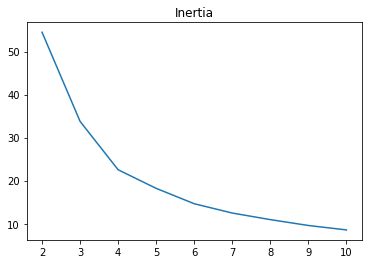

In [80]:
inertias = []

for i in range(2, 11):
    temp_model = KMeans(n_clusters=i, random_state=42)
    temp_model.fit(X_train_scaler)
    
    temp_inertia = temp_model.inertia_
    
    inertias.append(temp_inertia)
    
plt.plot(range(2, 11), inertias)

plt.title('Inertia')

По графику зависимости параметра `inertia_` делаем предположение, что кластеров должно быть `6`

In [81]:
model = KMeans(n_clusters=6, random_state=42)
labels = model.fit_predict(X_train_scaler)
labels

array([3, 5, 3, ..., 1, 0, 1], dtype=int32)

Text(0, 0.5, 'LifeSquare')

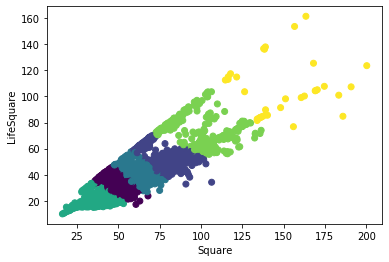

In [82]:
plt.scatter(X_train['Square'], X_train['LifeSquare'], c=labels)

plt.xlabel('Square')
plt.ylabel('LifeSquare')

In [83]:
model = AgglomerativeClustering(n_clusters=6)
X_train['Cluster_Square_LifeSquare'] = model.fit_predict(X_train_scaler)

Text(0, 0.5, 'LifeSquare')

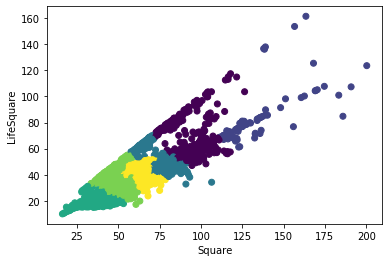

In [84]:
plt.scatter(X_train['Square'], X_train['LifeSquare'], c=X_train['Cluster_Square_LifeSquare'])

plt.xlabel('Square')
plt.ylabel('LifeSquare')

 С помощью метода KNN предсказываем значения кластеров для валидационной выборки.

In [85]:
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid.loc[:, features]), columns=features)

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaler, X_train['Cluster_Square_LifeSquare'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [88]:
X_valid['Cluster_Square_LifeSquare'] = knn.predict(X_valid_scaled)

Из признака `Cluster_Square_LifeSquare` делаем дамми-переменные.

In [89]:
X_train['Cluster_Square_LifeSquare'] = X_train['Cluster_Square_LifeSquare'].astype(object)
X_train = pd.get_dummies(X_train)

In [90]:
X_valid['Cluster_Square_LifeSquare'] = X_valid['Cluster_Square_LifeSquare'].astype(object)
X_valid = pd.get_dummies(X_valid)

## Загружаем тестовую выборку и проводим с ней такие же манипуляции, что и с тренировочной и валидационной выборками.

  Проводим аналогичные манипуляции для валидационной выборки:
 - Удаляем Healthcare_1
 - Заменяем 0-комнатные квартиры на квартиры другой комнатности, исходя из средней площади квартир с разным количеством комнат
 - Корректируем данные в Square и LifeSquare и исключаем слишком большие
 - Для малых значений Square делаем замену, привязанную к количеству комнат, а для малых значений LifeSquare и значений, превышающих Square, - к медианному отношению Square/LifeSquare
 - Корректируем данные в поле HouseFloor и приводим значения этажности дома, которая меньше этажа квартиры, к значению этажа квартиры.
 - Создаем дополнительные признаки:
 - - Средняя цена для каждого значения Social_1
 - - Средняя цена для каждого значения Social_2
 - - Средняя цена для каждого значения Social_3
 - - Количество домов в каждом районе
 - - Большой/маленький район
 - - Средняя цена для каждого значения Helthcare_2
 -  С помощью метода KNN предсказываем значения кластеров

In [91]:
test = pd.read_csv('test.csv')

In [92]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [93]:
test.drop('Healthcare_1', axis=1, inplace=True)

In [94]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000


In [95]:
test.Rooms.value_counts()

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
0.0        2
6.0        2
17.0       1
Name: Rooms, dtype: int64

In [96]:
test.loc[test.Rooms > 4]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
78,6553,34,5.0,122.375273,0.333490,0.0,9,0.0,1977,0.069753,B,B,53,13670,4,1,11,B
619,15858,9,5.0,97.537815,63.571997,8.0,5,14.0,1995,0.136244,B,B,11,2370,0,0,1,B
803,3747,23,5.0,139.045763,89.790274,42.0,1,3.0,2015,0.014073,B,B,2,475,0,0,0,B
1040,13562,78,5.0,116.656955,69.561006,10.0,5,14.0,2001,0.219006,B,B,28,6746,3,1,4,B
2071,10793,23,6.0,110.750226,NaN,0.0,2,2.0,2015,0.014073,B,B,2,475,0,0,0,B
3217,4058,27,6.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,B,B,53,14892,4,1,4,B
3253,12316,183,5.0,157.976101,101.040485,12.0,7,8.0,1908,0.246624,B,B,14,2940,45,3,6,B
3339,8638,25,5.0,120.330727,115.328430,1.0,14,25.0,2016,0.069753,B,B,53,13670,4,1,11,B
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,2,4,B
3912,6060,53,5.0,56.600162,2.742068,1.0,6,18.0,1977,0.049637,B,B,34,7759,0,1,3,B


In [97]:
test.loc[[3398, 3912], 'Rooms'] = 2

In [98]:
test.loc[test.Rooms == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
2406,3343,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,0,5,B
2524,10729,27,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,0,0,B


In [99]:
test = change_0_rooms(test, rooms_square_medians)

In [100]:
test.loc[test.Square > 300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2


In [101]:
test['LifeSquare'] = test['LifeSquare'].fillna(test.Square / median_square_lifesquare)

In [102]:
X_valid.loc[X_valid.LifeSquare > 300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Cluster_Square_LifeSquare_0,Cluster_Square_LifeSquare_1,Cluster_Square_LifeSquare_2,Cluster_Square_LifeSquare_3,Cluster_Square_LifeSquare_4,Cluster_Square_LifeSquare_5


In [103]:
test.loc[test.Square < 16]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,5,5,B
66,9011,53,1.0,1.378543,1.353573,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,1,3,B
608,16401,30,1.0,2.645046,4.338755,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,3,23,B
837,2138,27,1.0,5.647458,1.501582,1.0,1,1.0,1977,0.017647,B,B,2,469,0,0,0,B
1165,10120,6,1.0,5.100672,3.861780,1.0,3,1.0,1977,0.243205,B,B,5,1564,0,0,0,B
3697,15435,21,1.0,13.305531,9.495367,0.0,6,5.0,1965,0.194489,B,B,47,8004,3,3,5,B
4490,1165,27,1.0,2.372101,1.899119,1.0,2,17.0,1977,0.011654,B,B,4,915,0,0,0,B
4540,7855,6,1.0,4.967143,2.968086,1.0,3,1.0,2018,0.243205,B,B,5,1564,0,0,0,B
4713,170,6,2.0,2.900586,61.468563,1.0,18,17.0,2014,0.243205,B,B,5,1564,0,0,0,B
4902,1420,45,1.0,1.975769,2.900371,1.0,1,1.0,1977,0.195781,B,B,23,5212,6,3,2,B


In [104]:
test.loc[test.Square < 16, 'Square'] = test.Rooms * 10 + 15

In [105]:
X_valid.loc[X_valid.LifeSquare < 15]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Cluster_Square_LifeSquare_0,Cluster_Square_LifeSquare_1,Cluster_Square_LifeSquare_2,Cluster_Square_LifeSquare_3,Cluster_Square_LifeSquare_4,Cluster_Square_LifeSquare_5
879,13685,0,1.0,17.498542,10.798193,0.0,7,7.0,1961,0.319809,...,0,1,0,1,0,0,0,1,0,0
1636,15877,57,3.0,16.547242,10.211154,8.0,5,5.0,1962,0.133215,...,0,1,1,0,0,0,0,1,0,0
2562,14642,90,1.0,22.682706,13.997293,3.0,5,5.0,1969,0.265089,...,0,1,0,1,0,0,0,1,0,0


In [106]:
test.loc[test.LifeSquare < 15, 'LifeSquare'] = test.Square / median_square_lifesquare

In [107]:
test.loc[test.LifeSquare > test.Square]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
27,11160,58,1.0,48.610661,48.752502,1.0,4,3.0,1977,0.437885,B,B,23,5735,3,0,5,B
39,6624,27,1.0,42.413793,42.434887,10.0,12,17.0,2017,0.011654,B,B,4,915,0,0,0,B
43,11513,1,1.0,37.484057,40.593036,0.0,4,17.0,1977,0.007122,B,B,1,264,0,0,1,B
70,1872,30,2.0,52.449057,52.798349,1.0,17,17.0,2016,0.000078,B,B,22,6398,141,3,23,B
102,10749,6,2.0,65.582572,66.675758,1.0,4,2.0,2017,0.243205,B,B,5,1564,0,0,0,B
143,3895,21,1.0,36.514818,37.209976,7.0,10,9.0,1973,0.194489,B,B,47,8004,3,3,5,B
206,16055,62,3.0,108.218901,108.272277,10.0,4,17.0,2017,0.072158,B,B,2,629,1,0,0,A
261,16000,27,2.0,66.929231,68.087510,12.0,4,17.0,2018,0.072158,B,B,2,629,1,0,0,A
272,9887,1,2.0,53.658350,54.975247,10.0,10,17.0,2017,0.007122,B,B,1,264,0,0,1,B
284,256,6,1.0,38.870525,41.172814,1.0,9,1.0,1977,0.243205,B,B,5,1564,0,0,0,B


In [108]:
test.loc[test.KitchenSquare < 5, 'KitchenSquare'] = 5

In [109]:
test.loc[test.LifeSquare >= test.Square, 'LifeSquare'] = test.Square / median_square_lifesquare

In [110]:
test.loc[test.HouseFloor < test.Floor, 'HouseFloor'] = test.Floor

In [111]:
test.loc[test.HouseFloor > 40]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
651,15864,27,3.0,47.722835,47.098813,9.0,18,99.0,1977,0.072158,B,B,2,629,1,0,0,A
1587,5707,76,2.0,73.363523,38.740060,5.0,38,48.0,2010,0.000000,B,B,7,1660,39,1,5,B
3711,414,76,2.0,67.609808,41.175948,5.0,46,48.0,2002,0.000000,B,B,7,1660,39,1,5,B
3909,1397,76,3.0,221.138768,118.055342,5.0,32,48.0,2011,0.000000,B,B,7,1660,39,1,5,B
4698,15759,17,2.0,57.601870,37.744743,10.0,78,78.0,1989,0.000000,B,B,25,5027,4,1,1,B


In [112]:
test.loc[651, 'HouseFloor'] = 9
test.loc[4698, ['Floor', 'HouseFloor']] = 7

In [113]:
test = add_median_price_soc1(test, price_by_district_soc1, median_price)

test = add_median_price_soc2(test, price_by_district_soc2, median_price)

test = add_median_price_soc3(test, price_by_district_soc3, median_price)

test = add_distr_count(test, distr_count)

test = add_median_price_helth(test, price_by_district_helth, median_price)

test = add_median_price_rooms(test, price_by_rooms, median_price)

In [114]:
test_scaled = pd.DataFrame(scaler.transform(test.loc[:, features]), columns=features)

test['Cluster_Square_LifeSquare'] = knn.predict(test_scaled)

In [115]:
test['Cluster_Square_LifeSquare'] = test['Cluster_Square_LifeSquare'].astype(object)
test = pd.get_dummies(test)

In [116]:
X_train.to_pickle('X_train.pkl')
X_valid.to_pickle('X_valid.pkl')
test.to_pickle('test_mod.pkl')

## Строим модель

In [117]:
from sklearn.metrics import r2_score

In [118]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [119]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
X_train = pd.read_pickle('X_train.pkl')
X_valid = pd.read_pickle('X_valid.pkl')
test = pd.read_pickle('test_mod.pkl')

In [123]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 35 columns):
Id                             3000 non-null int64
DistrictId                     3000 non-null int64
Rooms                          3000 non-null float64
Square                         3000 non-null float64
LifeSquare                     3000 non-null float64
KitchenSquare                  3000 non-null float64
Floor                          3000 non-null int64
HouseFloor                     3000 non-null float64
HouseYear                      3000 non-null int64
Ecology_1                      3000 non-null float64
Social_1                       3000 non-null int64
Social_2                       3000 non-null int64
Social_3                       3000 non-null int64
Helthcare_2                    3000 non-null int64
Shops_1                        3000 non-null int64
Price                          3000 non-null float64
median_price_by_Social_1       3000 non-null float64
median_pri

In [124]:
X_train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Price',
       'median_price_by_Social_1', 'median_price_by_Social_2',
       'median_price_by_Social_3', 'distr_count', 'big_distr',
       'median_price_by_Helthcare_2', 'median_price_by_rooms', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B',
       'Cluster_Square_LifeSquare_0', 'Cluster_Square_LifeSquare_1',
       'Cluster_Square_LifeSquare_2', 'Cluster_Square_LifeSquare_3',
       'Cluster_Square_LifeSquare_4', 'Cluster_Square_LifeSquare_5'],
      dtype='object')

Признаки, которые будут использованы для построения модели:

In [125]:
features = ['DistrictId', 'Rooms', 'Square', 'median_price_by_rooms', 'HouseFloor',  'median_price_by_Social_1',
            'median_price_by_Social_2', 'median_price_by_Social_3', 'big_distr', 'median_price_by_Helthcare_2', 
            'Cluster_Square_LifeSquare_0', 'Cluster_Square_LifeSquare_1',
            'Cluster_Square_LifeSquare_2', 'Cluster_Square_LifeSquare_3',
            'Cluster_Square_LifeSquare_4', 'Cluster_Square_LifeSquare_5']

In [126]:
y_train = X_train.Price
y_valid = X_valid.Price

In [127]:
scaler = MinMaxScaler()

In [128]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.loc[:, features]), columns=features)

In [129]:
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid.loc[:, features]), columns=features)

In [130]:
params = {'n_estimators': [250, 300, 350],
          'max_features': np.arange(3, 8),
          'max_depth': np.arange(7, 9)}

reg = GridSearchCV(estimator=RandomForestRegressor(random_state=100),
                   param_grid=params,
                   n_jobs=-1,
                   scoring='r2',
                   cv=5,)

In [131]:
reg.fit(X_train.loc[:, features], y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=100,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([7, 8]),
      

## Наилучший набор параметров для модели случайного леса:

In [132]:
reg.best_params_

{'max_depth': 8, 'max_features': 7, 'n_estimators': 300}

In [133]:
reg = RandomForestRegressor(max_depth=8, max_features=7, n_estimators=300, random_state=100)
reg.fit(X_train.loc[:, features], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=100, verbose=0,
                      warm_start=False)

Text(0, 0.5, 'Признак')

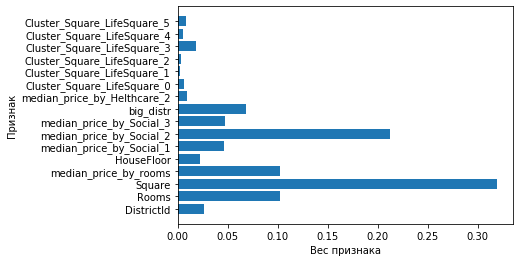

In [134]:
plt.barh(features, reg.feature_importances_)

plt.xlabel("Вес признака")
plt.ylabel("Признак")

In [135]:
y_pred_rf = reg.predict(X_valid.loc[:, features])
r2_score(y_valid, y_pred_rf)

0.709888627224203

In [136]:
y_pred_train_rf = reg.predict(X_train.loc[:, features])
r2_score(y_train, y_pred_train_rf)

0.8031721178241149

Модель случайного леса показала лучшее значение параметра `R2`, поэтому предсказания для тестовой выборки будем производить именно на ней.

In [137]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 34 columns):
Id                             5000 non-null int64
DistrictId                     5000 non-null int64
Rooms                          5000 non-null float64
Square                         5000 non-null float64
LifeSquare                     5000 non-null float64
KitchenSquare                  5000 non-null float64
Floor                          5000 non-null int64
HouseFloor                     5000 non-null float64
HouseYear                      5000 non-null int64
Ecology_1                      5000 non-null float64
Social_1                       5000 non-null int64
Social_2                       5000 non-null int64
Social_3                       5000 non-null int64
Helthcare_2                    5000 non-null int64
Shops_1                        5000 non-null int64
median_price_by_Social_1       5000 non-null float64
median_price_by_Social_2       5000 non-null float64
median_pri

In [138]:
features

['DistrictId',
 'Rooms',
 'Square',
 'median_price_by_rooms',
 'HouseFloor',
 'median_price_by_Social_1',
 'median_price_by_Social_2',
 'median_price_by_Social_3',
 'big_distr',
 'median_price_by_Helthcare_2',
 'Cluster_Square_LifeSquare_0',
 'Cluster_Square_LifeSquare_1',
 'Cluster_Square_LifeSquare_2',
 'Cluster_Square_LifeSquare_3',
 'Cluster_Square_LifeSquare_4',
 'Cluster_Square_LifeSquare_5']

In [139]:
test['Price']=reg.predict(test.loc[:, features])

In [140]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3_B,Shops_2_A,Shops_2_B,Cluster_Square_LifeSquare_0,Cluster_Square_LifeSquare_1,Cluster_Square_LifeSquare_2,Cluster_Square_LifeSquare_3,Cluster_Square_LifeSquare_4,Cluster_Square_LifeSquare_5,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,1,0,1,0,0,0,0,1,0,174302.475115
1,15856,74,2.0,69.263183,42.741687,5.0,6,6.0,1977,0.075779,...,1,0,1,0,0,0,0,0,1,213764.100943
2,5480,190,1.0,25.000000,15.948246,12.0,2,5.0,1909,0.000000,...,1,0,1,0,0,0,1,0,0,249005.490593
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,1,0,1,0,0,0,0,0,1,311537.526181
4,14275,27,1.0,47.527111,43.387569,5.0,17,17.0,2017,0.072158,...,1,1,0,0,0,0,0,1,0,135822.140413


In [141]:
test[['Id', 'Price']].to_csv('EBurdyugova_predictions.csv', index=None)